Mounted at /content/drive
Dataset Head:
    PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems      

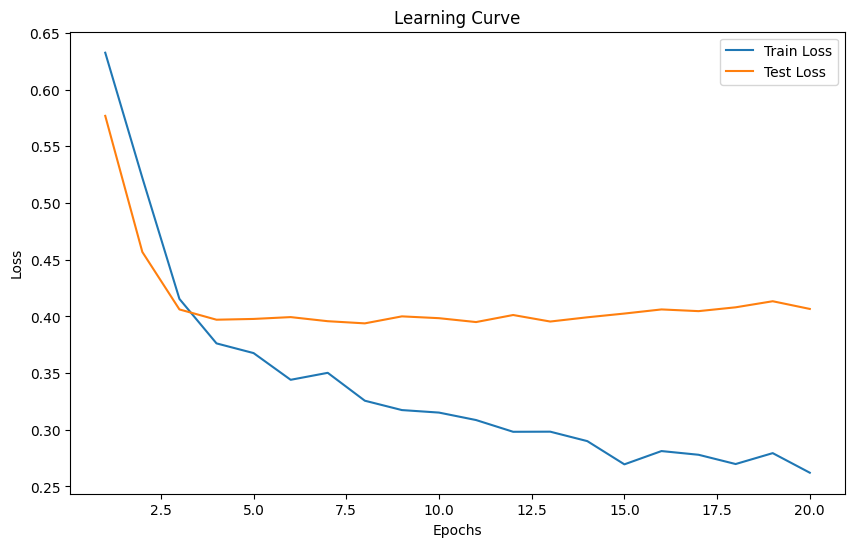

Model Accuracy: 0.83


In [ ]:
# @misc{rabie_el_kharoua_2024,
# title={Alzheimer's Disease Dataset},
# url={https://www.kaggle.com/dsv/8668279},
# DOI={10.34740/KAGGLE/DSV/8668279},
# publisher={Kaggle},
# author={Rabie El Kharoua},
# year={2024}
# }

# Authors: Steven Carr, Jordan Tong, Karthikmohan Jala, Avanith Kanamarlapudi,
#          Davis Jordan, HariKishanRao Madhavaram
# Date: November - December 2024


# Import required libraries
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/CS670/alzheimers_disease_data.csv'
data = pd.read_csv(file_path)

# Display basic info about the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n", data.info())

# Drop unnecessary columns
data = data.drop(columns=["PatientID", "DoctorInCharge"], axis=1)

# Separate features and labels
X = data.drop(columns=["Diagnosis"]).values
y = data["Diagnosis"].values

# Normalize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define the neural network model
class AlzheimerNN(nn.Module):
    def __init__(self, input_dim):
        super(AlzheimerNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3), # Remove dropouts to compare
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

# Initialize the model
input_dim = X_train.shape[1]
model = AlzheimerNN(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 20
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_losses.append(train_loss / len(train_loader))

    # Evaluate on test set
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            test_loss += loss.item()

    test_losses.append(test_loss / len(test_loader))
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Evaluate the model
from sklearn.metrics import accuracy_score

model.eval()
y_test_pred = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        y_pred = model(X_batch)
        y_test_pred.extend(y_pred.round().squeeze().numpy())

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Dataset Overview ===
First Five Rows:
    PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  .

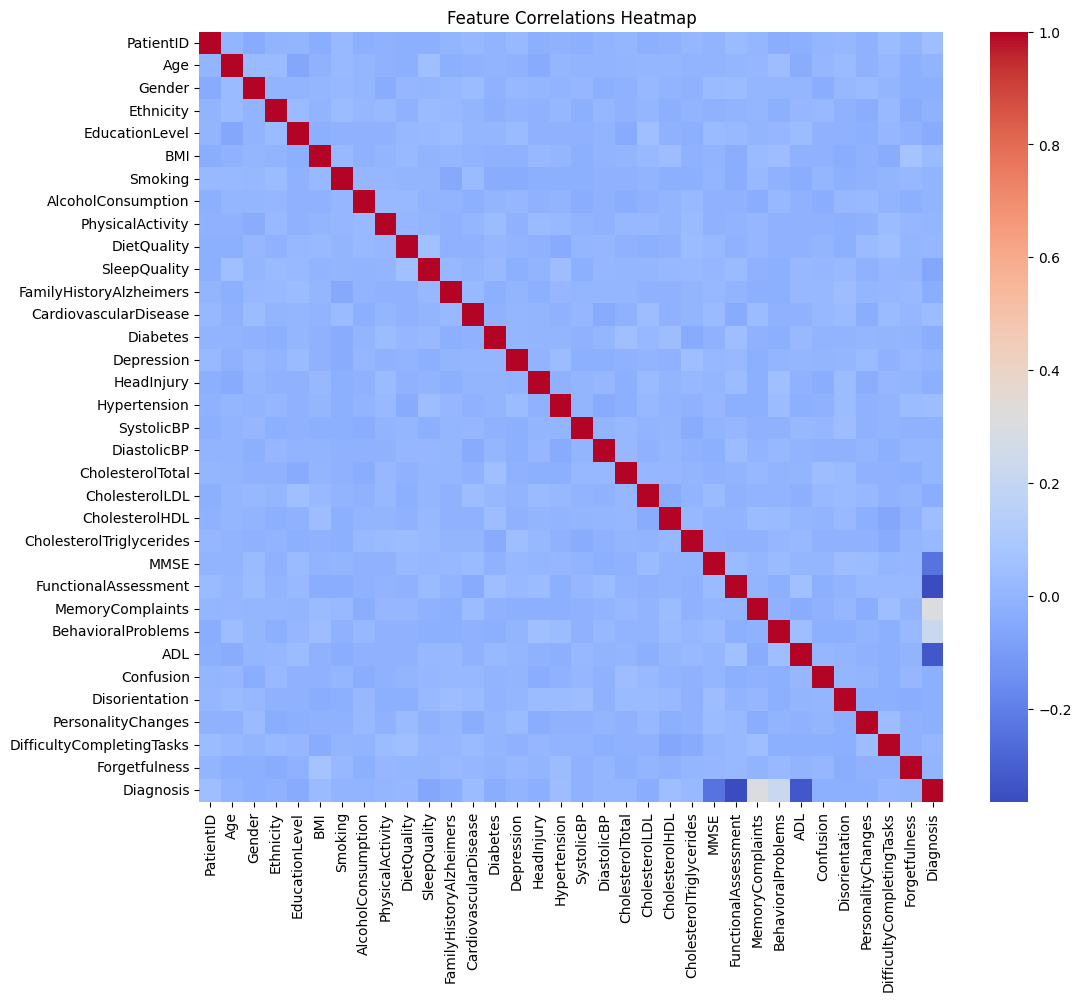


Dropping unnecessary columns: PatientID and DoctorInCharge

Data split into training and testing sets.

=== Training the Neural Network ===
Epoch 1/90, Train Loss: 0.6443, Test Loss: 0.5794
Epoch 2/90, Train Loss: 0.5455, Test Loss: 0.4405
Epoch 3/90, Train Loss: 0.4512, Test Loss: 0.3962
Epoch 4/90, Train Loss: 0.3991, Test Loss: 0.3943
Epoch 5/90, Train Loss: 0.4036, Test Loss: 0.3836
Epoch 6/90, Train Loss: 0.3895, Test Loss: 0.3792
Epoch 7/90, Train Loss: 0.3765, Test Loss: 0.3853
Epoch 8/90, Train Loss: 0.3724, Test Loss: 0.3922
Epoch 9/90, Train Loss: 0.3474, Test Loss: 0.3897
Epoch 10/90, Train Loss: 0.3429, Test Loss: 0.3901
Epoch 11/90, Train Loss: 0.3410, Test Loss: 0.3959
Epoch 12/90, Train Loss: 0.3271, Test Loss: 0.3963
Epoch 13/90, Train Loss: 0.3199, Test Loss: 0.4040
Epoch 14/90, Train Loss: 0.3137, Test Loss: 0.3988
Epoch 15/90, Train Loss: 0.3030, Test Loss: 0.3946
Epoch 16/90, Train Loss: 0.2912, Test Loss: 0.4026
Epoch 17/90, Train Loss: 0.3048, Test Loss: 0.3903
E

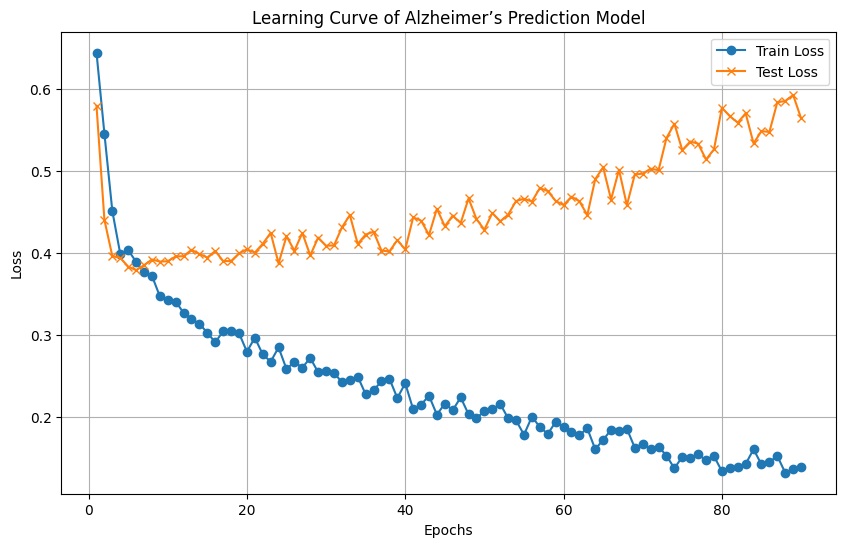


=== Evaluating Model Performance ===
Model Accuracy: 0.85


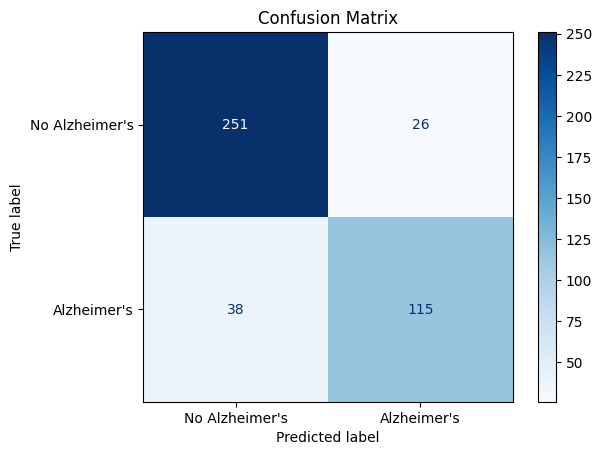

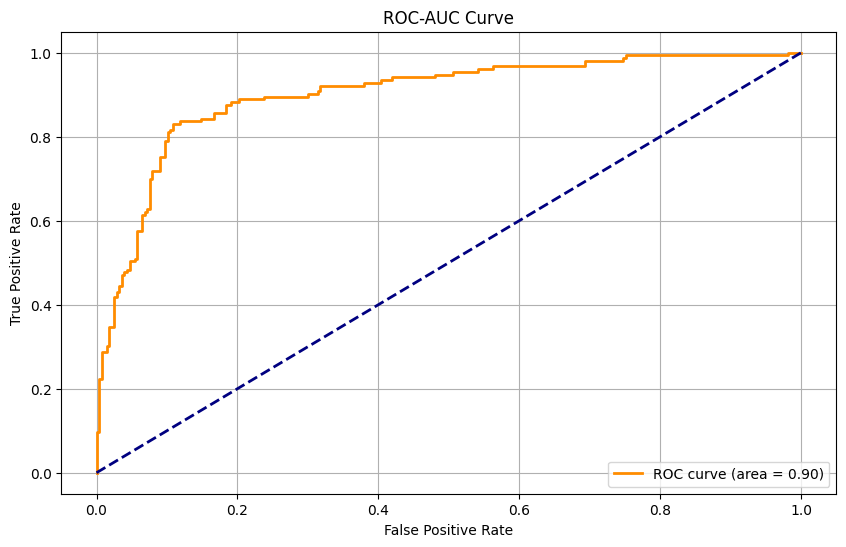


=== Classification Report ===
                precision    recall  f1-score   support

No Alzheimer's       0.87      0.91      0.89       277
   Alzheimer's       0.82      0.75      0.78       153

      accuracy                           0.85       430
     macro avg       0.84      0.83      0.83       430
  weighted avg       0.85      0.85      0.85       430



In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# 1. Load the Dataset
file_path = '/content/drive/MyDrive/CS670/alzheimers_disease_data.csv'
data = pd.read_csv(file_path)

# Display dataset overview
print("=== Dataset Overview ===")
print("First Five Rows:\n", data.head())
print("\nData Information:\n")
data.info()

# Visualize feature correlations (only numeric data)
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title("Feature Correlations Heatmap")
plt.show()

# Drop unnecessary columns
print("\nDropping unnecessary columns: PatientID and DoctorInCharge")
data = data.drop(columns=["PatientID", "DoctorInCharge"], axis=1)

# 2. Separate Features and Labels
X = data.drop(columns=["Diagnosis"]).values
y = data["Diagnosis"].values

# Normalize the feature data to improve model training
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets.")

# Convert datasets to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create PyTorch data loaders for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# 3. Define Neural Network Architecture
class AlzheimerNN(nn.Module):
    """
    Neural Network Model for Alzheimer's Diagnosis
    - Input Layer: Number of features in the dataset
    - Hidden Layers: Fully connected with ReLU activation and dropout
    - Output Layer: Binary classification using Sigmoid activation
    """
    def __init__(self, input_dim):
        super(AlzheimerNN, self).__init__()
        self.fc = nn.Sequential( # stack layers in a modular format
            nn.Linear(input_dim, 256),  # Increased neurons for better learning
            nn.ReLU(), # for non-linearity
            nn.Dropout(0.6),  # Increased dropout to prevent overfitting (randomly sets this percentage of neuron output to 0)
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64), # (NEW: Added hidden layer and additional dropout)
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, 1),
            nn.Sigmoid() # for output layer, converts output to probability between 0 and 1
        )

    def forward(self, x):
        return self.fc(x) # apply layers and activations in order

# Initialize the model with input dimension equal to the number of features
input_dim = X_train.shape[1]
model = AlzheimerNN(input_dim)

# Define the Binary Cross-Entropy loss function and Adam optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 4. Train the Model
epochs = 90 # Increase number of epochs (OG: 30 NEW: 50 Second new: 90)
train_losses = []
test_losses = []

print("\n=== Training the Neural Network ===")
for epoch in range(epochs):
    # Training phase
    model.train() # training mode
    train_loss = 0 # initialize the cumulative training loss
    for X_batch, y_batch in train_loader: # iterate through batches
        optimizer.zero_grad() # Reset gradients from prev step
        y_pred = model(X_batch) # Predict output for this batch
        loss = criterion(y_pred, y_batch) # Calc loss between pred and true labels
        loss.backward() # Compute gradients of the loss w/respect to model params
        optimizer.step() # update model params using optimizer
        train_loss += loss.item() # Add onto the batch loss

    train_losses.append(train_loss / len(train_loader)) # Avg training loss over all batches

    # Validation phase
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            test_loss += loss.item()

    test_losses.append(test_loss / len(test_loader)) # Avg test loss over all batches
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

# 5. Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve of Alzheimer’s Prediction Model')
plt.legend()
plt.grid()
plt.show()

# 6. Evaluate the Model on Test Set
print("\n=== Evaluating Model Performance ===")
model.eval() # Eval mode
y_test_pred = [] # Store predictions
y_test_proba = [] # Store predicted probabilities
with torch.no_grad(): # Disable gradient calc for inference
    for X_batch, _ in test_loader:
        y_pred = model(X_batch) # Predict for the test batch
        y_test_pred.extend(y_pred.round().squeeze().numpy()) # Store rounded predictions
        y_test_proba.extend(y_pred.squeeze().numpy())  # Probabilities for ROC

# Compute accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# 7. Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Alzheimer's", "Alzheimer's"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 8. ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 9. Print Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_test_pred, target_names=["No Alzheimer's", "Alzheimer's"]))


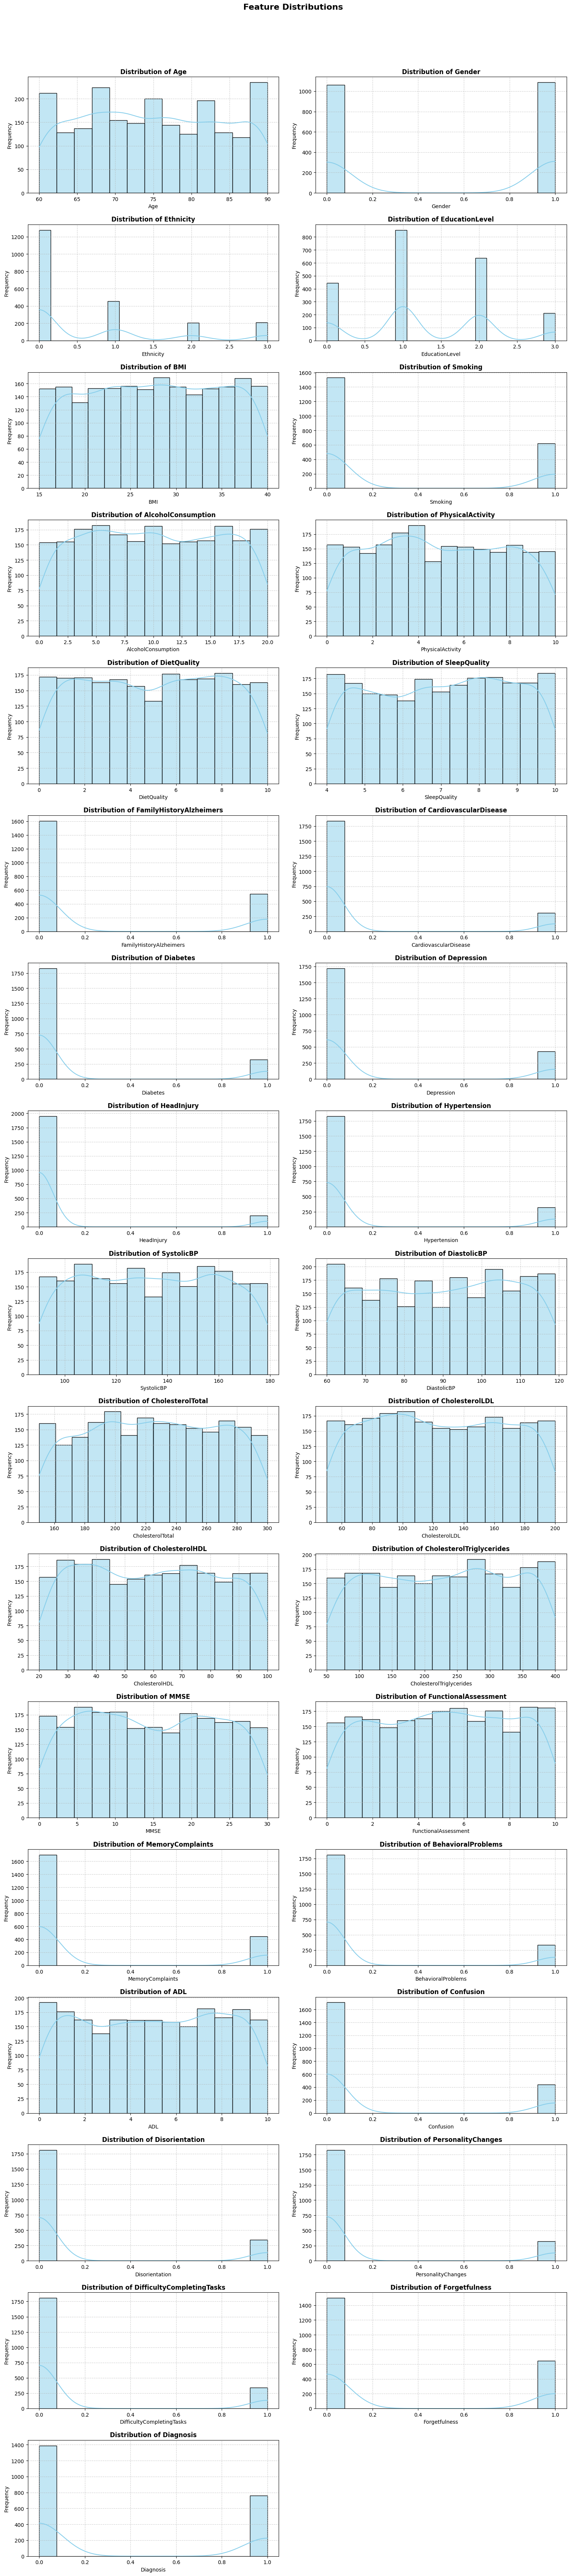

In [ ]:
# Plot feature distributions

numeric_features = data.select_dtypes(include=[np.number]).columns
num_features = len(numeric_features)

# Set grid size: 2 columns, dynamic rows
cols = 2
rows = (num_features + 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
fig.tight_layout(pad=4.0)  # Increase spacing

# Flatten axes for easy iteration if rows/cols > 1
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(numeric_features):
    sns.histplot(data[feature], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {feature}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].grid(visible=True, linestyle='--', alpha=0.6)  # Add grid for readability

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add a global title
fig.suptitle("Feature Distributions", fontsize=16, fontweight='bold', y=1.02)

# Show the plots
plt.show()


<ipython-input-6-588cffd50149>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=data, palette="Set2")


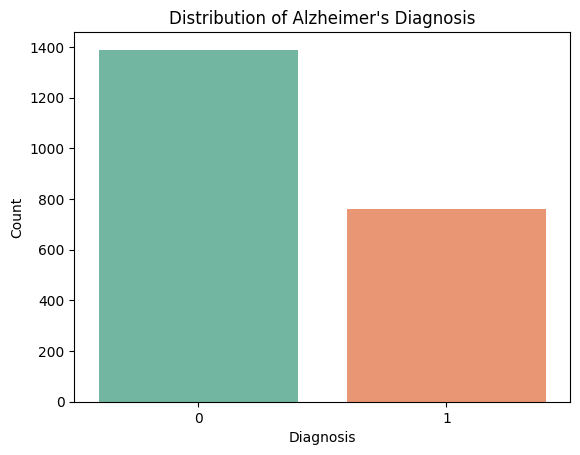

In [ ]:
# Plot class distribution
sns.countplot(x='Diagnosis', data=data, palette="Set2")
plt.title("Distribution of Alzheimer's Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


Feature Correlations with Diagnosis:
 Diagnosis                    1.000000
MemoryComplaints             0.306742
BehavioralProblems           0.224350
CholesterolHDL               0.042584
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026343
CholesterolTriglycerides     0.022672
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
CholesterolTotal             0.006394
PhysicalActivity             0.005945
DiastolicBP                  0.005293
Forgetfulness               -0.000354
Smoking                     -0.004865
Age                         -0.005488
Depression                  -0.005893
AlcoholConsumption          -0.007618
Ethnicity                   -0.014782
SystolicBP                  -0.015615
Confusion                   -0.019186
PersonalityChanges          -0.020627
Gender                      -0.020975
HeadInjury                  -0.021411
Disorientation              -0.024648
Diabetes    

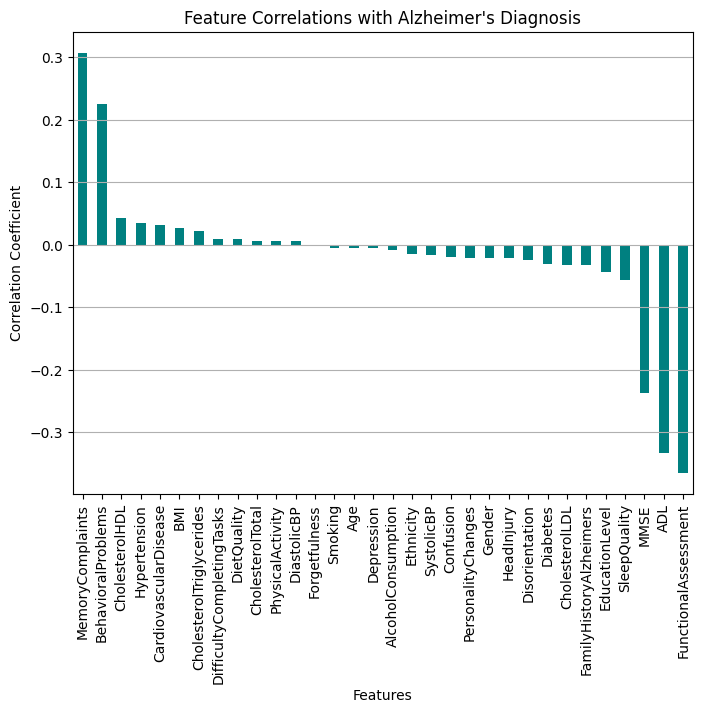

In [ ]:
# Feature correlations with diagnosis
diagnosis_correlation = data.corr()['Diagnosis'].sort_values(ascending=False)
print("Feature Correlations with Diagnosis:\n", diagnosis_correlation)

# Plot the correlations
plt.figure(figsize=(8, 6))
diagnosis_correlation.drop("Diagnosis").plot(kind="bar", color='teal')
plt.title("Feature Correlations with Alzheimer's Diagnosis")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y')
plt.show()


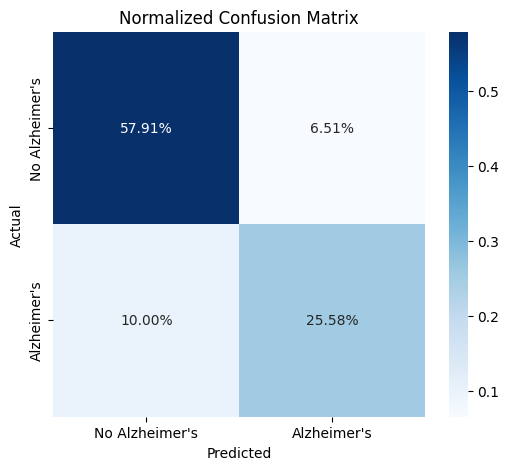

In [ ]:
# Confusion Matrix with Percentages
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True, fmt=".2%", cmap="Blues", xticklabels=["No Alzheimer's", "Alzheimer's"], yticklabels=["No Alzheimer's", "Alzheimer's"])
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


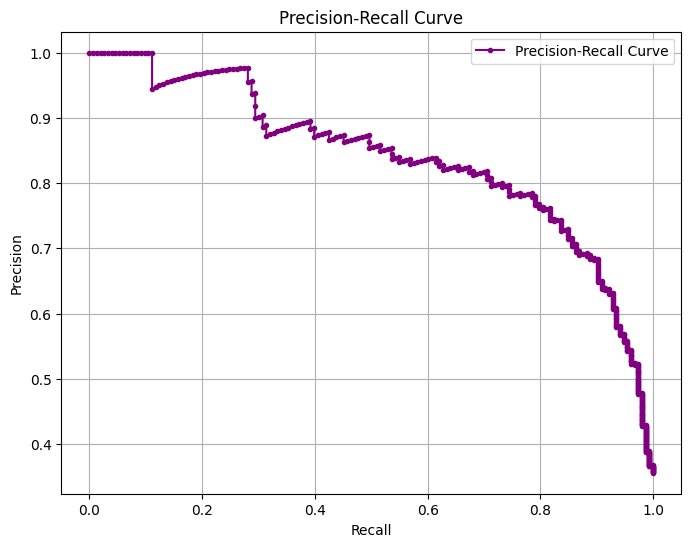

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='purple', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()
